# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Self-reported life satisfaction, 2011 to 2023 
### 1.2 Fragestellung:
- Welches Land hat die höchste/niedriegste Lebenszufriedenheit? Was sind die Gründe dafür? 
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
-




### 1.4 Daten beschaffen und laden

In [401]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [402]:
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df.head()

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

Die Daten sind im Long-Format.

In [403]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Cantril ladder score')
df_pivot.head()

Jahr,2011,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Gebiet,,,,,,,,,,,
Afghanistan,4.258350,3.575000,3.360000,3.794000,3.631500,3.203300,2.566900,2.522900,2.403800,1.859000,1.721000
Africa,4.453107,4.474157,4.395968,4.457408,4.445971,4.511974,4.459995,4.551006,4.517288,4.426524,4.384616
Albania,5.133704,4.959000,4.655000,4.644000,4.586000,4.718600,4.882700,5.117400,5.198800,5.277300,5.304200
Algeria,5.367827,5.605000,6.355000,5.872000,5.294600,5.211300,5.005100,4.887100,5.122300,5.329100,5.363500
Angola,4.178380,4.033000,3.866000,3.795000,3.794800,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

Über die einzelnen Spalten lässt sich Folgendes aussagen: 
- Die Spalte Gebiete enthält 178 verschiedene Gebiete. 
- Die Spalte Codes enthält 169 verschiedene Codes. 
- Es sind Daten zwischen 2011 und 2023 vorhanden. 2014 gab es am meisten Daten. 


In [404]:
import pandas as pd
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Cantril ladder score']) 
df

,Gebiet,Code,Jahr,Cantril ladder score
0,Afghanistan,AFG,2011,4.25835
1,Afghanistan,AFG,2014,3.57500
2,Afghanistan,AFG,2015,3.36000
3,Afghanistan,AFG,2016,3.79400
4,Afghanistan,AFG,2017,3.63150
...,...,...,...,...
1782,Zimbabwe,ZWE,2019,3.29920
1783,Zimbabwe,ZWE,2020,3.14480
1784,Zimbabwe,ZWE,2021,2.99510
1785,Zimbabwe,ZWE,2022,3.20350


In [405]:
df.dtypes

Gebiet                   object
Code                     object
Jahr                      int64
Cantril ladder score    float64
dtype: object

## 3.1 Analyse Gebiete ##

In [406]:
len(df['Gebiet'].unique())


178

In [407]:
df['Gebiet'].value_counts()

Gebiet
Afghanistan    11
Niger          11
Montenegro     11
Morocco        11
Myanmar        11
               ..
Djibouti        2
Puerto Rico     2
Cuba            1
Guyana          1
Oman            1
Name: count, Length: 178, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

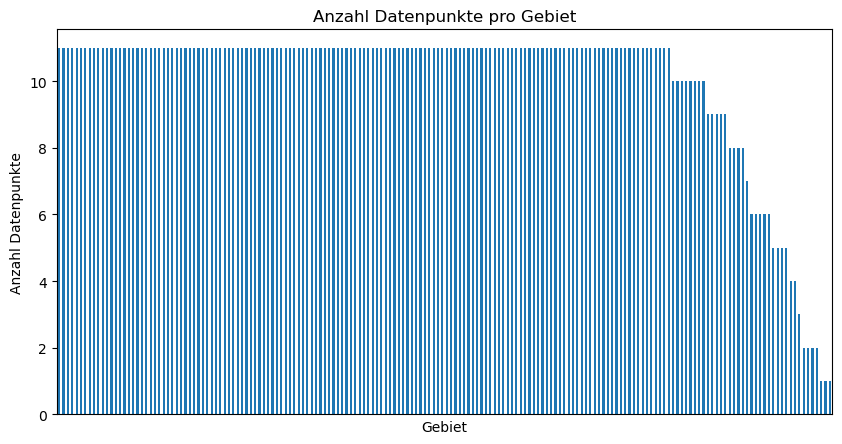

In [408]:
df['Gebiet'].value_counts().plot(kind='bar', xticks=[],ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Gebiet')

## 3.2 Analyse Codes ##

In [409]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [410]:
df['Code'].value_counts()

Code
AFG    11
PHL    11
MNE    11
MAR    11
MMR    11
       ..
PRI     2
SUR     2
CUB     1
OMN     1
GUY     1
Name: count, Length: 168, dtype: int64

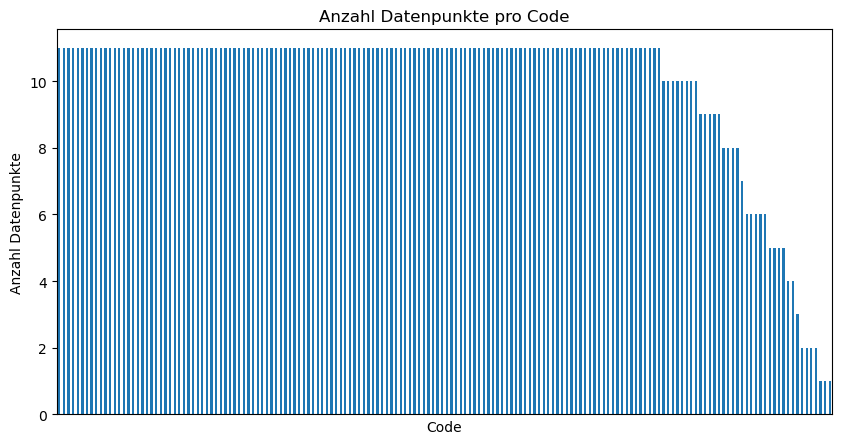

In [411]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte',figsize= (10,5), title='Anzahl Datenpunkte pro Code');

In [412]:
value_counts = df['Gebiet'].value_counts()
low_data_countries = value_counts[value_counts < 11]
print(low_data_countries)

Gebiet
Azerbaijan                      10
Laos                            10
Yemen                           10
Kuwait                          10
Libya                           10
Mozambique                      10
Gabon                           10
Namibia                         10
Comoros                          9
Democratic Republic of Congo     9
Belarus                          9
Turkmenistan                     9
Rwanda                           9
Lesotho                          8
Northern Cyprus                  8
Haiti                            8
Burundi                          8
Trinidad and Tobago              7
Central African Republic         6
Eswatini                         6
Syria                            6
Gambia                           6
Qatar                            6
Bhutan                           5
Angola                           5
Sudan                            5
South Sudan                      5
Belize                           4
Somalia      

In [413]:
value_counts = df['Gebiet'].value_counts()
low_data_countries = value_counts[value_counts < 11]
count_of_low_data_countries = len(low_data_countries)
print(count_of_low_data_countries)

37


In [414]:
value_counts = df['Gebiet'].value_counts()
exactly_11_data_countries = value_counts[value_counts == 11]
count_of_exactly_11_data_countries = len(exactly_11_data_countries)
print(count_of_exactly_11_data_countries)

141


## 3.3 Analyse Jahr ##

In [415]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  11


#### Anzahl Datenpunkte pro Jahr ####

In [416]:
df['Jahr'].value_counts().sort_index()

Jahr
2011    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
Name: count, dtype: int64

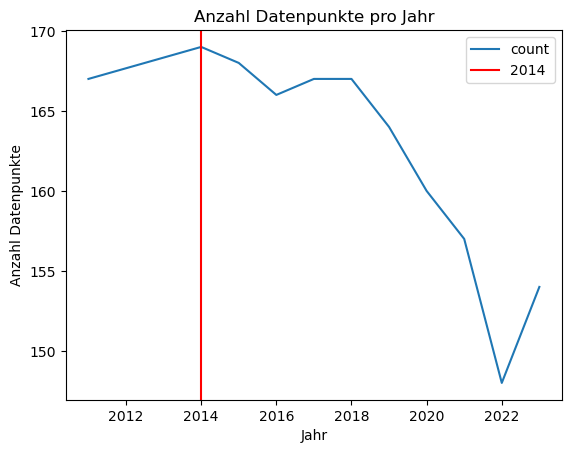

In [417]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2014, color='red',label='2014')
g.legend()  

In [418]:
print('Mittelwert:',df['Cantril ladder score'].mean())
print('Median:',df['Cantril ladder score'].median())
print('Standardabweichung:',df['Cantril ladder score'].std())
print('5% Perzentil:',df['Cantril ladder score'].quantile(0.05))
print('99.9% Perzentil:',df['Cantril ladder score'].quantile(0.999))
print('Max:',df['Cantril ladder score'].max())
print('Min:',df['Cantril ladder score'].min())

Mittelwert: 5.455646661275882
Median: 5.4318
Standardabweichung: 1.1146867665403009
5% Perzentil: 3.59783
99.9% Perzentil: 7.825515400000003
Max: 7.85574
Min: 1.721


In [419]:
df.describe()

,Jahr,Cantril ladder score
count,1787.000000,1787.000000
mean,2017.702854,5.455647
std,3.470175,1.114687
min,2011.000000,1.721000
25%,2015.000000,4.594467
50%,2018.000000,5.431800
75%,2021.000000,6.298900
max,2023.000000,7.855740


In [420]:
df.sort_values(by='Cantril ladder score', ascending=False).head(10)

,Gebiet,Code,Jahr,Cantril ladder score
418,Denmark,DNK,2011,7.85574
521,Finland,FIN,2020,7.84210
522,Finland,FIN,2021,7.82100
520,Finland,FIN,2019,7.80870
523,Finland,FIN,2022,7.80420
519,Finland,FIN,2018,7.76890
524,Finland,FIN,2023,7.74070
424,Denmark,DNK,2019,7.64560
426,Denmark,DNK,2021,7.63620
518,Finland,FIN,2017,7.63210


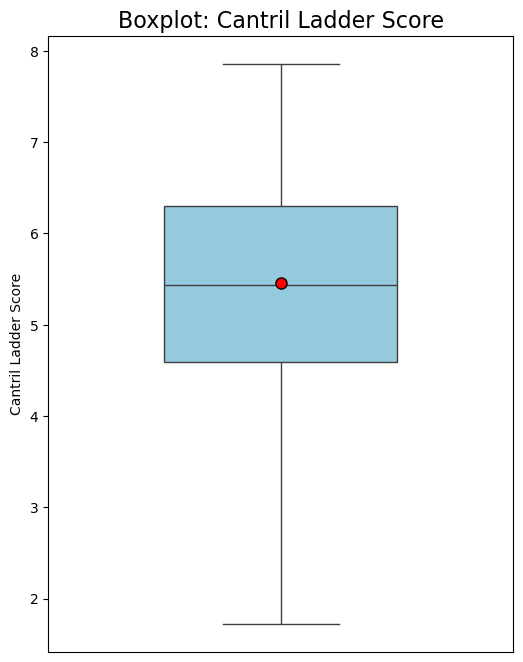

In [421]:
score_data = df['Cantril ladder score'].dropna()
plt.figure(figsize=(6, 8))
sns.boxplot(data=[score_data],width=0.5,color="skyblue",showmeans=True,meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black", "markersize": 8},whis=[0, 100] )

plt.title("Boxplot: Cantril Ladder Score", fontsize=16)
plt.ylabel("Cantril Ladder Score")
plt.xticks([]) 

plt.show()

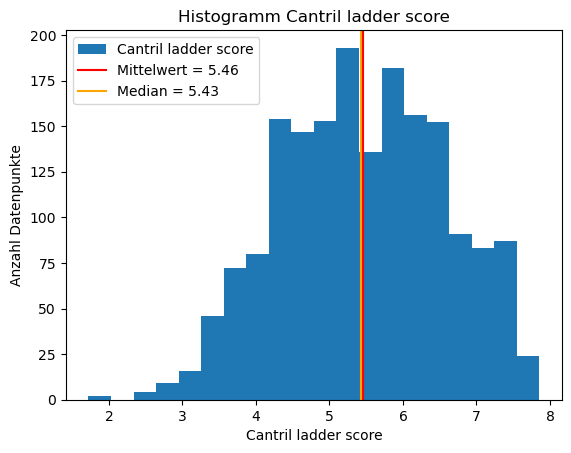

In [422]:

g = df['Cantril ladder score'].plot(kind='hist', bins=20, title='Histogramm Cantril ladder score', 
                           xlabel='Cantril ladder score', ylabel='Anzahl Datenpunkte')
mean = df['Cantril ladder score'].mean()
g.axvline(x=df['Cantril ladder score'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  


median = df['Cantril ladder score'].median()
g.axvline(x=df['Cantril ladder score'].median(), color='orange',label=  f'Median = {median:.2f}')  

g.legend()


## 4. Analyse ##

In [423]:
diffs = df_pivot[2023]-df_pivot[2014]   
diffs = diffs.sort_values().dropna()  
diffs

Gebiet
Lebanon         -2.1325
Afghanistan     -1.8540
Lesotho         -1.7118
Zambia          -1.6266
Eswatini        -1.3650
                  ...  
Serbia           1.2878
Romania          1.3672
Guinea           1.3673
Togo             1.3751
Cote d'Ivoire    1.4251
Length: 152, dtype: float64

<Axes: title={'center': 'Grösste und kleinste Differenzen des Cantril ladder score 2011-2023'}, ylabel='Gebiet'>

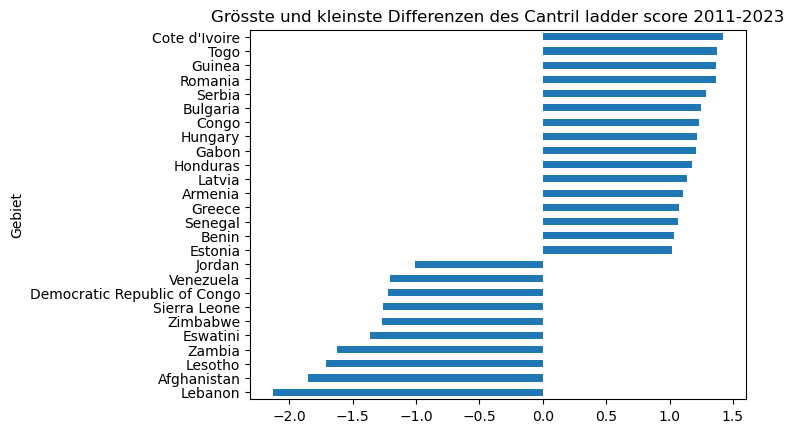

In [424]:
diff_sel = (diffs < -1) | (diffs > 1) 
diffs[diff_sel].plot(kind='barh', title='Grösste und kleinste Differenzen des Cantril ladder score 2011-2023')

In [425]:
Gebiets_liste = diffs[diff_sel].index.tolist()  
print(Gebiets_liste)

['Lebanon', 'Afghanistan', 'Lesotho', 'Zambia', 'Eswatini', 'Zimbabwe', 'Sierra Leone', 'Democratic Republic of Congo', 'Venezuela', 'Jordan', 'Estonia', 'Benin', 'Senegal', 'Greece', 'Armenia', 'Latvia', 'Honduras', 'Gabon', 'Hungary', 'Congo', 'Bulgaria', 'Serbia', 'Romania', 'Guinea', 'Togo', "Cote d'Ivoire"]


In [426]:
max_score = df['Cantril ladder score'].max()
min_score = df['Cantril ladder score'].min()
max_score_gebiet = df[df['Cantril ladder score'] == max_score]['Gebiet']
min_score_gebiet = df[df['Cantril ladder score'] == min_score]['Gebiet']


print(f"Der höchste Cantril ladder score ist {max_score} und kommt aus den Gebieten: {max_score_gebiet.tolist()}")
print(f"Der niedrigste Cantril ladder score ist {min_score} und kommt aus den Gebieten: {min_score_gebiet.tolist()}")

Der höchste Cantril ladder score ist 7.85574 und kommt aus den Gebieten: ['Denmark']
Der niedrigste Cantril ladder score ist 1.721 und kommt aus den Gebieten: ['Afghanistan']


In [427]:
top_5_scores = df.nlargest(5, 'Cantril ladder score')
bottom_5_scores = df.nsmallest(5, 'Cantril ladder score')

top_5_gebiete = top_5_scores[['Gebiet', 'Cantril ladder score']]
bottom_5_gebiete = bottom_5_scores[['Gebiet', 'Cantril ladder score']]

print("Die 5 höchsten Cantril ladder scores und die zugehörigen Gebiete:")
for _, row in top_5_gebiete.iterrows():
    print(f"{row['Gebiet']}: {row['Cantril ladder score']}")

print("\nDie 5 niedrigsten Cantril ladder scores und die zugehörigen Gebiete:")
for _, row in bottom_5_gebiete.iterrows():
    print(f"{row['Gebiet']}: {row['Cantril ladder score']}")

Die 5 höchsten Cantril ladder scores und die zugehörigen Gebiete:
Denmark: 7.85574
Finland: 7.8421
Finland: 7.821
Finland: 7.8087
Finland: 7.8042

Die 5 niedrigsten Cantril ladder scores und die zugehörigen Gebiete:
Afghanistan: 1.721
Afghanistan: 1.859
Lebanon: 2.3922
Afghanistan: 2.4038
Afghanistan: 2.5229


In [428]:
df_clean = df.dropna(subset=['Gebiet', 'Cantril ladder score'])

top_5_scores_all_years = df_clean.groupby('Gebiet')['Cantril ladder score'].max().nlargest(5)
bottom_5_scores_all_years = df_clean.groupby('Gebiet')['Cantril ladder score'].min().nsmallest(5)

print("Die 5 Länder mit den höchsten Cantril ladder scores über alle Jahre:")
for country, score in top_5_scores_all_years.items():
    print(f"{country}: {score}")

print("\nDie 5 Länder mit den niedrigsten Cantril ladder scores über alle Jahre:")
for country, score in bottom_5_scores_all_years.items():
    print(f"{country}: {score}")

Die 5 Länder mit den höchsten Cantril ladder scores über alle Jahre:
Denmark: 7.85574
Finland: 7.8421
Norway: 7.5937
Switzerland: 7.587
Iceland: 7.561

Die 5 Länder mit den niedrigsten Cantril ladder scores über alle Jahre:
Afghanistan: 1.721
Lebanon: 2.3922
Central African Republic: 2.693
South Sudan: 2.8166
Togo: 2.839


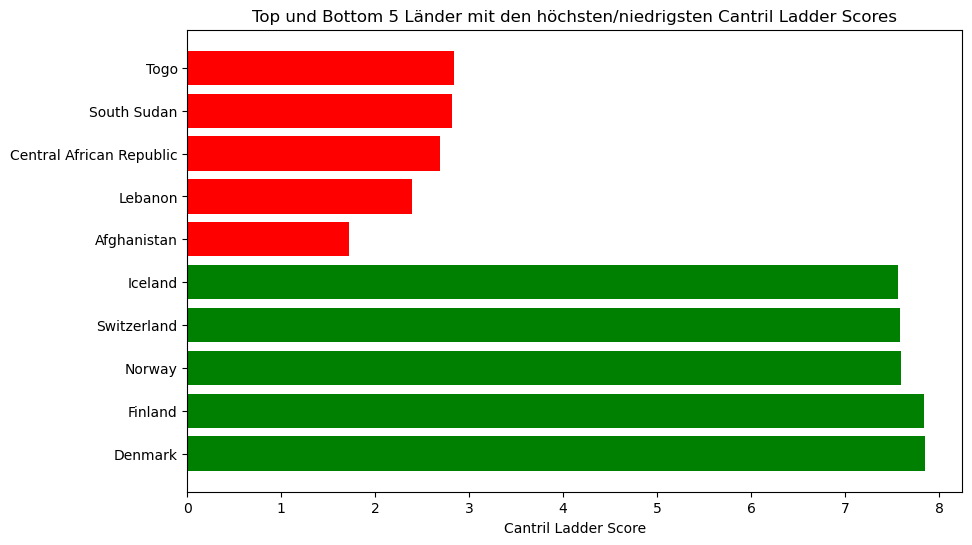

In [429]:
top_5 = {
    "Denmark": 7.85574,
    "Finland": 7.8421,
    "Norway": 7.5937,
    "Switzerland": 7.587,
    "Iceland": 7.561
}

bottom_5 = {
    "Afghanistan": 1.721,
    "Lebanon": 2.3922,
    "Central African Republic": 2.693,
    "South Sudan": 2.8166,
    "Togo": 2.839
}

countries = list(top_5.keys()) + list(bottom_5.keys())
scores = list(top_5.values()) + list(bottom_5.values())

plt.figure(figsize=(10, 6))
plt.barh(countries, scores, color=['green']*5 + ['red']*5)
plt.xlabel('Cantril Ladder Score')
plt.title('Top und Bottom 5 Länder mit den höchsten/niedrigsten Cantril Ladder Scores')
plt.show()

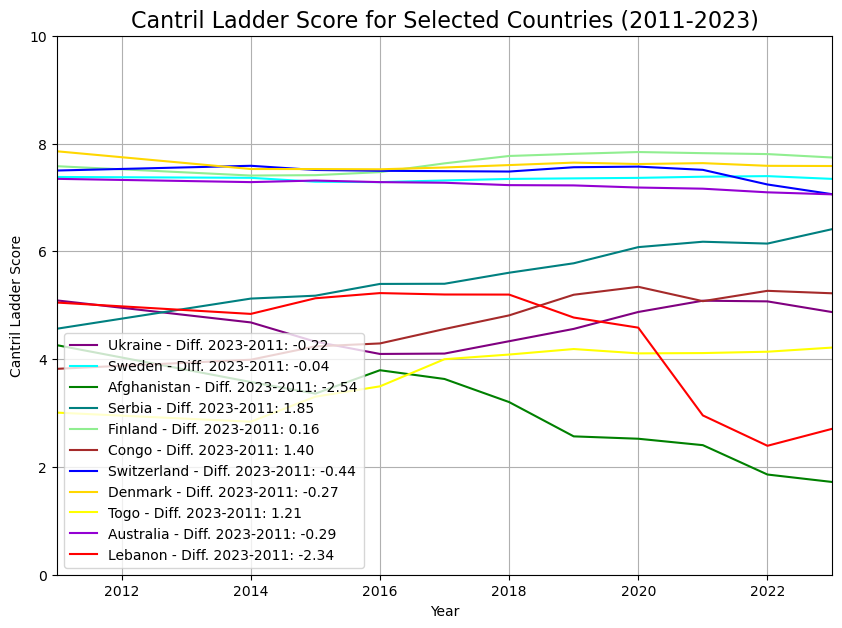

In [430]:
df = pd.read_csv('happiness-cantril-ladder.csv', skiprows=1,
                 names=['Gebiet', 'Code', 'Jahr', 'Cantril Ladder Score'])

df_filtered = df[(df['Jahr'] >= 2011) & (df['Jahr'] <= 2023)]

selected_countries = list({
    'Switzerland', 'Sweden', 'Finland','Denmark', 'Serbia', 'Australia', 
    'Afghanistan', 'Lebanon', 'Lesotho', 'Togo', 'Congo', 
    'Demokratische Republik Kongo', 'Ukraine'
})

color_dict = {
    'Switzerland': 'blue',
    'Sweden': 'cyan',
    'Finland': 'lightgreen',
    'Denmark': 'gold',
    'Serbia': 'teal',
    'Australia': 'darkviolet',
    'Afghanistan': 'green',
    'Lebanon': 'red',
    'Lesotho': 'orange',
    'Togo': 'yellow',
    'Congo': 'brown',
    'Demokratische Republik Kongo': 'pink',
    'Ukraine': 'purple'
}

plt.figure(figsize=(10, 7))

for gebiet in selected_countries:
    if gebiet in df_filtered['Gebiet'].values:
        if (df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2023)].shape[0] > 0) and \
           (df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2011)].shape[0] > 0):
            
            diff = df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2023)]['Cantril Ladder Score'].values[0] - \
                   df_filtered[(df_filtered['Gebiet'] == gebiet) & (df_filtered['Jahr'] == 2011)]['Cantril Ladder Score'].values[0]
            
            region_data = df_filtered[df_filtered['Gebiet'] == gebiet]
            plt.plot(region_data['Jahr'], region_data['Cantril Ladder Score'],
                     label=f'{gebiet} - Diff. 2023-2011: {diff:.2f}',
                     color=color_dict.get(gebiet, 'gray'))  

plt.title('Cantril Ladder Score for Selected Countries (2011-2023)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Cantril Ladder Score')
plt.legend(loc='best')
plt.xlim([2011, 2023])  
plt.ylim([0, 10])  
plt.grid(True)

plt.show()

In [431]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [432]:
df = pd.read_csv('life-satisfaction-vs-life-expectancy.filtered.csv', skiprows=1,
                 names=['Entity', 'Code', 'Year absolut', 'Life expectancy', 'Cantril ladder score', 
                        'Population', 'Gebiet', 'Year', 'Endyear'])

df.head()

,Entity,Code,Year absolut,Life expectancy,Cantril ladder score,Population,Gebiet,Year,Endyear
0,Afghanistan,AFG,2011.0,61.250,4.25835,29347709.0,Asia,2011,2023
1,Afghanistan,AFG,2012.0,61.735,NaN,30560036.0,Asia,2012,2023
2,Afghanistan,AFG,2013.0,62.188,NaN,31622708.0,Asia,2013,2023
3,Afghanistan,AFG,2014.0,62.260,3.57500,32792527.0,Asia,2014,2023
4,Afghanistan,AFG,2015.0,62.270,3.36000,33831765.0,Asia,2015,2023


In [433]:
df = df.drop(columns=['Year absolut', 'Population', 'Endyear'])

df.head()

,Entity,Code,Life expectancy,Cantril ladder score,Gebiet,Year
0,Afghanistan,AFG,61.250,4.25835,Asia,2011
1,Afghanistan,AFG,61.735,NaN,Asia,2012
2,Afghanistan,AFG,62.188,NaN,Asia,2013
3,Afghanistan,AFG,62.260,3.57500,Asia,2014
4,Afghanistan,AFG,62.270,3.36000,Asia,2015


In [434]:
selected_countries = ['Switzerland', 'Sweden', 'Finland', 'Serbia', 'Australia', 'Afghanistan', 'Lebanon', 'Lesotho', 'Togo', 'Congo', 'Democratic Republic of Congo', 'Ukraine']

df_filtered_2020 = df[(df['Year'] == 2020) & (df['Entity'].isin(selected_countries))]

df_filtered_2020.head()

,Entity,Code,Life expectancy,Cantril ladder score,Gebiet,Year
9,Afghanistan,AFG,61.454,2.5229,Asia,2020
256,Australia,AUS,83.664,7.1835,Oceania,2020
750,Congo,COG,64.391,5.3417,Africa,2020
880,Democratic Republic of Congo,COD,60.428,NaN,Africa,2020
1231,Finland,FIN,81.822,7.8421,Europe,2020


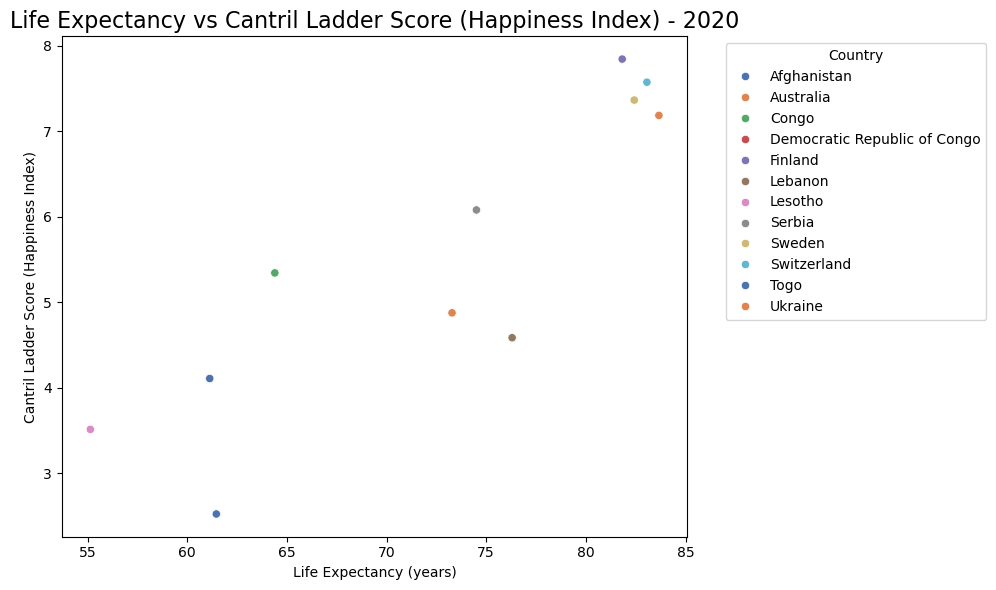

In [435]:
selected_countries = ['Switzerland', 'Sweden', 'Finland', 'Serbia', 'Australia', 'Afghanistan', 'Lebanon', 
                      'Lesotho', 'Togo', 'Congo', 'Democratic Republic of Congo', 'Ukraine']


df_filtered_2020 = df[(df['Year'] == 2020) & (df['Entity'].isin(selected_countries))]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered_2020, x='Life expectancy', y='Cantril ladder score', hue='Entity', 
                palette='deep')  

plt.title('Life Expectancy vs Cantril Ladder Score (Happiness Index) - 2020', fontsize=16)
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Cantril Ladder Score (Happiness Index)')

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

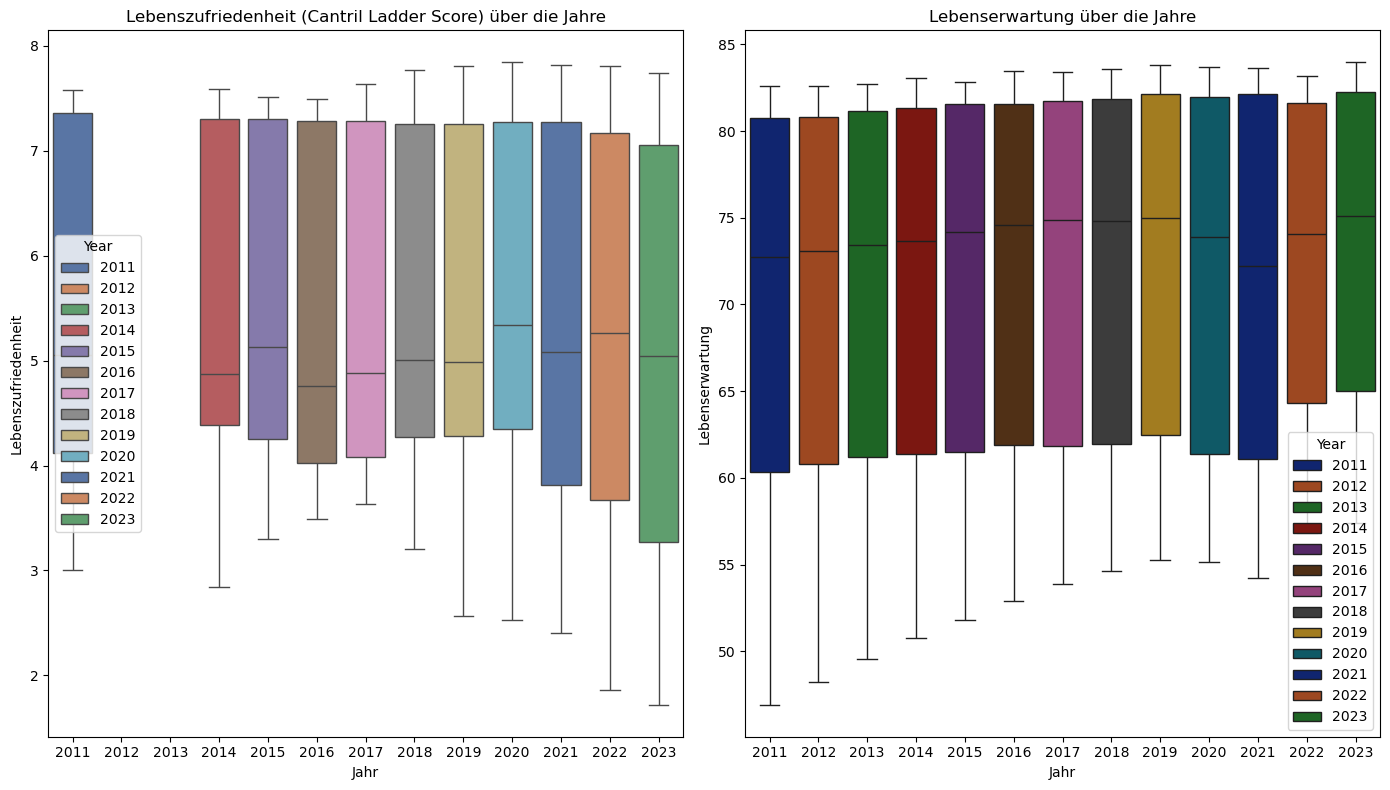

In [458]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='Year', y='Cantril ladder score', data=df_filtered, hue='Year', palette='deep')
plt.title('Lebenszufriedenheit (Cantril Ladder Score) über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Lebenszufriedenheit')

plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='Life expectancy', data=df_filtered, hue='Year', palette='dark')
plt.title('Lebenserwartung über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Lebenserwartung')

plt.tight_layout()
plt.show()

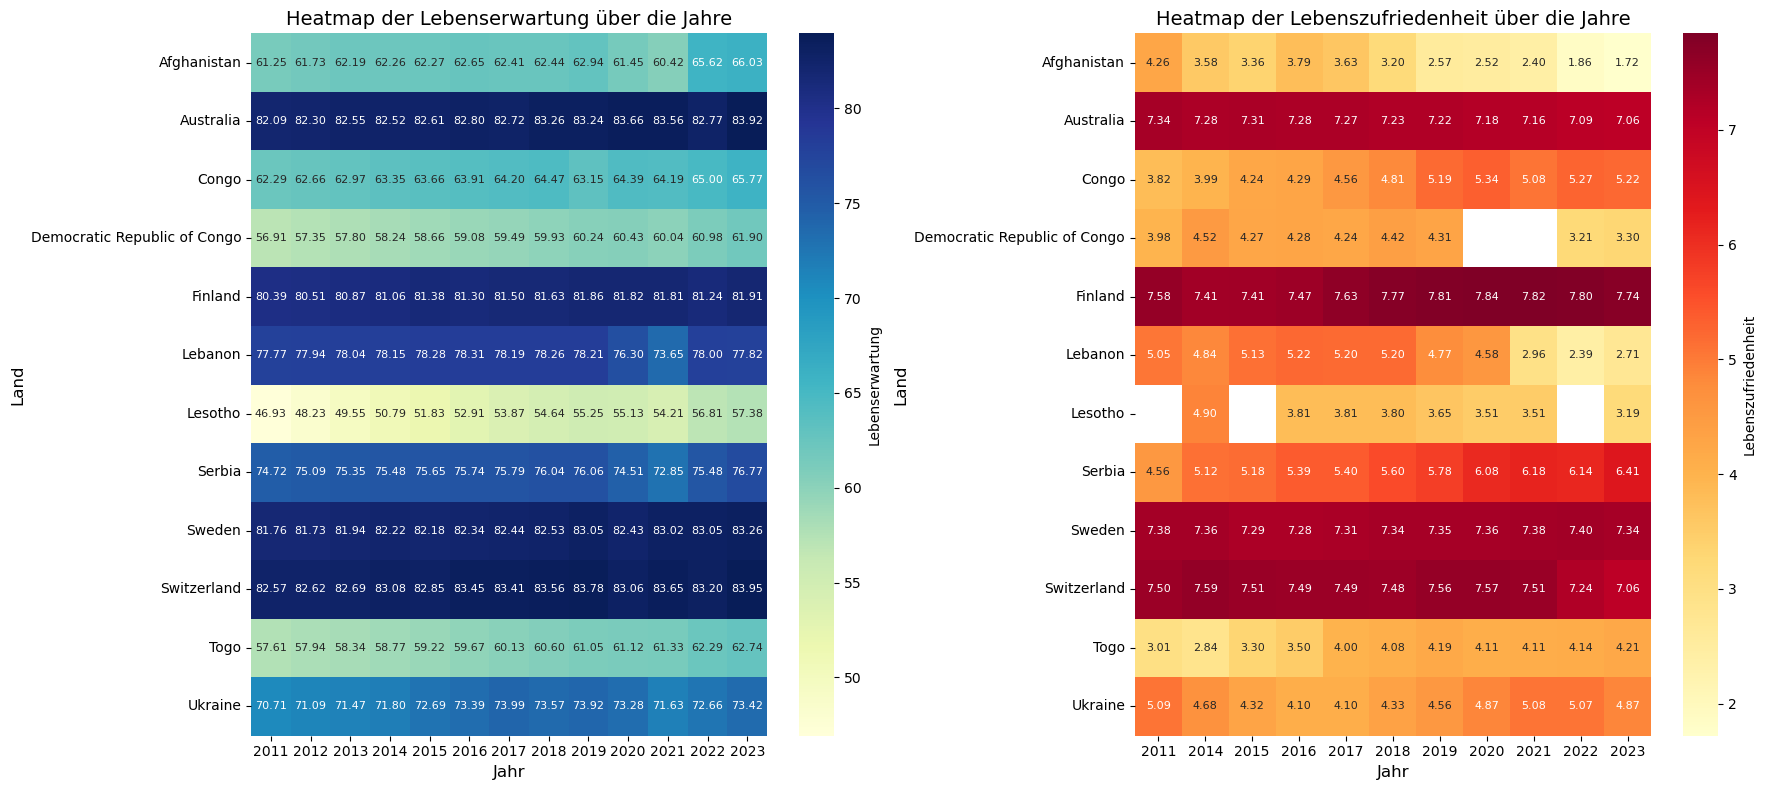

In [449]:
df_pivot = df_filtered.pivot_table(index='Entity', columns='Year', values=['Life expectancy', 'Cantril ladder score'])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1 Zeile, 2 Spalten

sns.heatmap(df_pivot['Life expectancy'], cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Lebenserwartung'}, 
            ax=axes[0], annot_kws={'size': 8})  # Schriftgröße anpassen
axes[0].set_title('Heatmap der Lebenserwartung über die Jahre', fontsize=14)
axes[0].set_xlabel('Jahr', fontsize=12)
axes[0].set_ylabel('Land', fontsize=12)

sns.heatmap(df_pivot['Cantril ladder score'], cmap='YlOrRd', annot=True, fmt='.2f', cbar_kws={'label': 'Lebenszufriedenheit'}, 
            ax=axes[1], annot_kws={'size': 8}) 
axes[1].set_title('Heatmap der Lebenszufriedenheit über die Jahre', fontsize=14)
axes[1].set_xlabel('Jahr', fontsize=12)
axes[1].set_ylabel('Land', fontsize=12)

plt.tight_layout()
plt.show()